In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

####IMPORT STATEMENTS

In [1]:
import io
import locale
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

####Look-up for City Names

In [2]:
jurisdiction_codes = {
    1: 'Carlsbad',2: 'Chula Vista',3: 'Coronado',4: 'Del Mar',5: 'El Cajon',6: 'Encinitas',7: 'Escondido',
    8: 'Imperial Beach',9: 'La Mesa',10: 'Lemon Grove',11: 'National City',12: 'Oceanside',13: 'Poway',
    14: 'San Diego',15: 'San Marcos',16: 'Santee',17: 'Solana Beach',18: 'Vista',19: 'Unincorporated'
}

jurisdictions = pd.Series(jurisdiction_codes, name='jurisdiction')

mode_codes = {
    'Auto SOV (Non-Toll)': (1, 1),'Auto SOV (Toll)': (2, 1),
    'Auto 2 Person (Non-Toll, Non-HOV)': (3, 2),'Auto 2 Person (Non-Toll, HOV)': (4, 2),'Auto 2 Person (Toll, HOV)': (5, 2),
    'Auto 3+ Person (Non-Toll, Non-HOV)': (6, 3),'Auto 3+ Person (Non-Toll, HOV)': (7, 3),'Auto 3+ Person (Toll, HOV)': (8, 3),
    'Walk': (9, 4),'Bike': (10, 5),
    'Walk-Local Bus': (11, 6),'Walk-Express Bus': (12, 6),'Walk-Light Rail': (14, 6),'Walk-Heavy Rail': (15, 6),
    'PNR-Local Bus': (16, 6),'PNR-Express Bus': (17, 6),'PNR-Light Rail': (19, 6),'PNR-Heavy Rail': (20, 6),
    'KNR-Local Bus': (21, 6),'KNR-Express Bus': (22, 6),'KNR-Light Rail': (24, 6),'KNR-Heavy Rail': (25, 6)
}



modes = pd.DataFrame({'mode_id': [1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,19,20,21,22,24,25]
                      ,'super_mode' : ['Drive Alone','Drive Alone','HOV','HOV','HOV','HOV','HOV','HOV','Walk','Bike','Transit','Transit','Transit','Transit','Transit','Transit','Transit','Transit','Transit','Transit','Transit','Transit']}
                    ,index = ['Auto SOV (Non-Toll)','Auto SOV (Toll)'
                             ,'Auto 2 Person (Non-Toll, Non-HOV)','Auto 2 Person (Non-Toll, HOV)','Auto 2 Person (Toll, HOV)'
                             ,'Auto 3+ Person (Non-Toll, Non-HOV)','Auto 3+ Person (Non-Toll, HOV)','Auto 3+ Person (Toll, HOV)'
                             ,'Walk','Bike'
                             ,'Walk-Local Bus','Walk-Express Bus','Walk-Light Rail','Walk-Heavy Rail'
                             ,'PNR-Local Bus','PNR-Express Bus','PNR-Light Rail','PNR-Heavy Rail'
                             ,'KNR-Local Bus','KNR-Express Bus','KNR-Light Rail','KNR-Heavy Rail'
                            ])

####Load up the datasets

In [12]:
locale.setlocale(locale.LC_ALL, '')

base_csv_url = 'E:/Apps/sandag.github.io/transnet/baseline_mandatory_residents.csv'
alt_csv_url = 'E:/Apps/sandag.github.io/transnet/no_coaster_mandatory_residents.csv'

base_df = pd.read_csv(base_csv_url, index_col='tour_ij_id')
alt_df = pd.read_csv(alt_csv_url, index_col='tour_ij_id')

base_df = pd.merge(base_df, modes, left_on='mode_desc', right_index=True)
alt_df = pd.merge(alt_df, modes, left_on='mode_desc', right_index=True)

####Casual Tour Statistics

In [13]:
print 'Total Number of Mandatory Tours (Base Case): {0:>10,}'.format(len(base_df))
print 'Total Number of Mandatory Tours (Alt Case): {0:>11,}'.format(len(alt_df))

Total Number of Mandatory Tours (Base Case):  1,107,866
Total Number of Mandatory Tours (Alt Case):   1,107,852


####Total Daily Time Change for Workers

In [14]:
daily_min_change = alt_df.tour_time.sum() - base_df.tour_time.sum()

print 'Total Daily Change in Time Spent on Mandatory Tours: {0:>12,.1f} minutes'.format(daily_min_change)
print 'Total Daily Change in Time Spent on Mandatory Tours: {0:>12,.1f} hours'.format(daily_min_change / 60.)

Total Daily Change in Time Spent on Mandatory Tours:   -128,390.6 minutes
Total Daily Change in Time Spent on Mandatory Tours:     -2,139.8 hours


####Total Annual Time Change for Workers

In [15]:
base_df.loc[:, 'annual_tour_time'] = base_df.tour_time * base_df.weeks_worked * base_df.avg_days_worked
alt_df.loc[:, 'annual_tour_time'] = alt_df.tour_time * alt_df.weeks_worked * alt_df.avg_days_worked

annual_min_change = alt_df.annual_tour_time.sum() - base_df.annual_tour_time.sum()

print 'Total Annual Change in Time Spent on Mandatory Tours: {0:>15,.0f} minutes'.format(annual_min_change)
print 'Total Annual Change in Time Spent on Mandatory Tours: {0:>15,.0f} hours'.format(annual_min_change / 60.)

Total Annual Change in Time Spent on Mandatory Tours:     -27,790,417 minutes
Total Annual Change in Time Spent on Mandatory Tours:        -463,174 hours


####Total Annual Monetary Savings for Workers
Value of time is derived from person table: hh_income / num_workers / annual_hours_worked

In [16]:
base_df.loc[:, 'annual_commute_cost'] = base_df.derived_hourly_salary * (base_df.annual_tour_time / 60)
alt_df.loc[:, 'annual_commute_cost'] = alt_df.derived_hourly_salary * (alt_df.annual_tour_time / 60)

annual_cost_difference = alt_df.annual_commute_cost.sum() - base_df.annual_commute_cost.sum()

print 'Total Annual Change in User Costs without the Project: {0}'.format(locale.currency(annual_cost_difference, grouping=True))
print 'Average Annual Commuter Savings without the Project: {0}'.format(locale.currency(annual_cost_difference / len(base_df)), grouping=True)

Total Annual Change in User Costs without the Project: ($20,992,594.49)
Average Annual Commuter Savings without the Project: ($18.95)


####Total and Average Annual Savings for Commuters by Jurisdiction
Value of time is derived from person table: hh_income / num_workers / annual_hours_worked

In [17]:
base_jurisdiction = base_df[['home_jurisdiction','tour_time', 'annual_tour_time', 'annual_commute_cost']].groupby('home_jurisdiction').sum()
alt_jurisdiction = alt_df[['home_jurisdiction','tour_time', 'annual_tour_time', 'annual_commute_cost']].groupby('home_jurisdiction').sum()
base_commuters = base_df[['home_jurisdiction','annual_commute_cost']].groupby('home_jurisdiction').count()
base_commuters.columns = ['commuters']

jurisdiction_diff = alt_jurisdiction - base_jurisdiction
jurisdiction_diff = jurisdiction_diff.join(jurisdictions)
print jurisdiction_diff[['jurisdiction','annual_commute_cost']].to_string(formatters={'annual_commute_cost': '${:,.2f}'.format})

commuter_savings = jurisdiction_diff['annual_commute_cost'] / base_commuters['commuters']
print pd.concat([jurisdictions, commuter_savings], axis=1, keys=['jurisdiction','avg_annual_commute_savings']).to_string(formatters={'avg_annual_commute_savings': '${:,.2f}'.format})

                     jurisdiction annual_commute_cost
home_jurisdiction                                    
1                        Carlsbad      $-1,446,391.31
2                     Chula Vista       $1,213,196.47
3                        Coronado        $-135,196.93
4                         Del Mar         $362,161.13
5                        El Cajon        $-483,660.58
6                       Encinitas      $-1,322,969.26
7                       Escondido         $591,535.35
8                  Imperial Beach         $267,042.09
9                         La Mesa        $-434,868.49
10                    Lemon Grove         $363,833.56
11                  National City         $229,614.98
12                      Oceanside        $-457,843.61
13                          Poway         $322,798.25
14                      San Diego     $-13,247,856.80
15                     San Marcos      $-1,373,025.78
16                         Santee        $-100,057.59
17                   Solana 

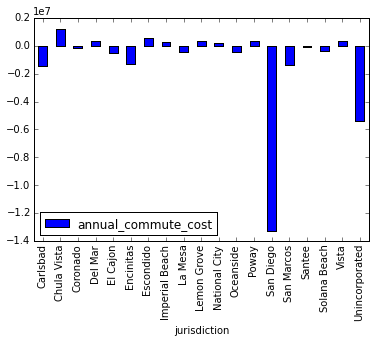

In [18]:
jurisdiction_diff[['jurisdiction','annual_commute_cost']].plot(kind='bar', y='annual_commute_cost', x='jurisdiction')

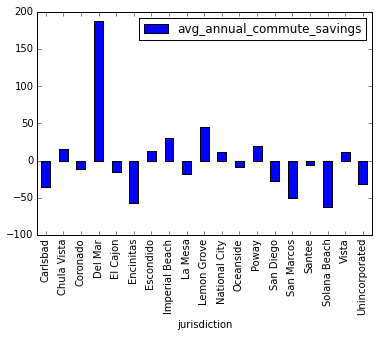

In [19]:
pd.concat([jurisdictions, commuter_savings], axis=1, keys=['jurisdiction','avg_annual_commute_savings']).plot(kind='bar', x='jurisdiction')

In [20]:
base_mode_sum = base_df[['super_mode','tour_time', 'annual_tour_time', 'annual_commute_cost']].groupby('super_mode').sum()
alt_mode_sum = alt_df[['super_mode','tour_time', 'annual_tour_time', 'annual_commute_cost']].groupby('super_mode').sum()

alt_mode_sum - base_mode_sum

,tour_time,annual_tour_time,annual_commute_cost
super_mode,,,
Bike,4789.785000,1396702.104000,-230813.568123
Drive Alone,13519.141700,5232097.122743,-745694.831832
HOV,8149.160824,1858838.008145,-991097.702143
Transit,-139037.678706,-33085410.788765,-17770561.199980
Walk,-15810.982262,-3192643.053321,-1254427.184635


In [29]:
base_mode = base_df[['super_mode','tour_time', 'annual_tour_time', 'annual_commute_cost','tour_distance']].groupby('super_mode').agg(['count','mean','sum'])
alt_mode = alt_df[['super_mode','tour_time', 'annual_tour_time', 'annual_commute_cost', 'tour_distance']].groupby('super_mode').agg(['count', 'mean','sum'])
base_mode

tour_time                              annual_tour_time  \
                count        mean              sum            count   
super_mode                                                            
Bike            14385   37.856062    544559.458000            14385   
Drive Alone    704642   50.410824  35521584.098408           704642   
HOV            316258   49.039920  15509267.008630           316258   
Transit         36931  111.360357   4112649.328931            36931   
Walk            35650   37.748578   1345736.788285            35650   

                                        annual_commute_cost               \
                     mean           sum               count         mean   
super_mode                                                                 
Bike          8082.532017  1.162672e+08               14385  3490.993241   
Drive Alone  11658.788654  8.215272e+09              704642  6874.263946   
HOV          11187.257663  3.538060e+09              316258  5937.012172   
Transit      24126.439655  8.910135e+08               36931  9440.669019   
Walk          7234.566461  2.579123e+08               35650  2495.986470   

                          tour_distance                              
                      sum         count       mean              sum  
super_mode                                                           
Bike         5.021794e+07         14385   7.571212    108911.891527  
Drive Alone  4.843895e+09        704642  26.310874  18539747.110046  
HOV          1.877628e+09        316258  25.580671   8090091.871794  
Transit      3.486533e+08         36931  17.395971    642450.590613  
Walk         8.898192e+07         35650   1.887429     67286.839703

In [30]:
alt_mode

tour_time                              annual_tour_time  \
                count        mean              sum            count   
super_mode                                                            
Bike            14490   37.912301    549349.243000            14490   
Drive Alone    704923   50.409908  35535103.240108           704923   
HOV            316925   48.962424  15517416.169454           316925   
Transit         36096  110.084543   3973611.650225            36096   
Walk            35418   37.549433   1329925.806023            35418   

                                        annual_commute_cost               \
                     mean           sum               count         mean   
super_mode                                                                 
Bike          8120.353703  1.176639e+08               14490  3449.767026   
Drive Alone  11661.563394  8.220504e+09              704923  6870.465853   
HOV          11169.578203  3.539919e+09              316925  5921.389911   
Transit      23767.955788  8.579281e+08               36096  9166.743859   
Walk          7191.813521  2.547197e+08               35418  2476.918247   

                          tour_distance                              
                      sum         count       mean              sum  
super_mode                                                           
Bike         4.998712e+07         14490   7.582460    109869.848578  
Drive Alone  4.843149e+09        704923  26.299728  18539283.492167  
HOV          1.876636e+09        316925  25.480612   8075442.987308  
Transit      3.308828e+08         36096  16.706023    603020.593060  
Walk         8.772749e+07         35418   1.877472     66496.290599

In [31]:
alt_mode - base_mode

tour_time                          annual_tour_time              \
                count      mean            sum            count        mean   
super_mode                                                                    
Bike              105  0.056239    4789.785000              105   37.821687   
Drive Alone       281 -0.000917   13519.141700              281    2.774739   
HOV               667 -0.077496    8149.160824              667  -17.679460   
Transit          -835 -1.275814 -139037.678706             -835 -358.483867   
Walk             -232 -0.199145  -15810.982262             -232  -42.752940   

                             annual_commute_cost                               \
                         sum               count        mean              sum   
super_mode                                                                      
Bike          1396702.104000                 105  -41.226215   -230813.568123   
Drive Alone   5232097.122743                 281   -3.798093   -745694.831832   
HOV           1858838.008145                 667  -15.622260   -991097.702143   
Transit     -33085410.788765                -835 -273.925160 -17770561.199980   
Walk         -3192643.053321                -232  -19.068223  -1254427.184635   

            tour_distance                          
                    count      mean           sum  
super_mode                                         
Bike                  105  0.011248    957.957051  
Drive Alone           281 -0.011146   -463.617879  
HOV                   667 -0.100059 -14648.884486  
Transit              -835 -0.689948 -39429.997553  
Walk                 -232 -0.009957   -790.549104

In [26]:
print 'Total Daily Change in Person Miles Traveled (PMT) on Mandatory Tours: {0:>12,.1f} miles'.format(alt_df.tour_distance.sum() - base_df.tour_distance.sum())

Total Daily Change in Person Miles Traveled (PMT) on Mandatory Tours:    -54,375.1 miles
